In [907]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# **Products**

## Carga de datos productos

In [908]:
df_products = pd.read_csv("../dataset_amazon/amazon - amazon_product.csv")
print(f"Filas y columnas de productos dataset: {df_products.shape}")

Filas y columnas de productos dataset: (1469, 7)


# Tipos de datos y valores no nulos por columna

In [909]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


# Identificación de valores nulos

In [910]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64


Para identificar qué columnas tienen nulos se usó *isnull().sum()* , para el caso de *products* se encontró que en la columna **about_product** hay 4 nulos, se tomará la decisión de imputar con *"sin info"* más adelante.

# Manejo de valores nulos

### DataFrame *products* 

```
df_products['about_product'] → selecciona la columna about_product del DataFrame df_products.
.fillna("Sin descripción") → reemplaza todos los valores nulos (NaN) de esa columna con el texto "Sin descripción".
El resultado se reasigna a la misma columna.
```

In [911]:
df_products['about_product'] = df_products['about_product'].fillna("Sin descripción")

Comprobamos que ya no tenemos nulos

In [912]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          0
dtype: int64


# Normalizamos valores en DataFrame **products**

In [913]:
# Precios
df_products['discounted_price'] = df_products['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df_products['actual_price'] = df_products['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

# Descuento
df_products['discount_percentage'] = df_products['discount_percentage'].str.replace('%','').astype(float)


# Valores duplicados

Contamos duplicados en **products**, usando *duplicated().sum()* , nos dice cuántas columnas completas están duplicadas, es decir, todas las columnas iguales.

In [914]:
print(df_products.duplicated().sum())

106


En el caso de **products** hay 106 filas iguales, por lo que hay que eliminar filas idénticas para cada caso.

## Eliminación de filas idénticas

In [915]:
#products
df_products = df_products.drop_duplicates()

Revisamos **id's** , es decir en *products*, la columnas de **product_id**, ya que se espera que sean únicos.

In [916]:
print(df_products['product_id'].duplicated().sum())

12


En el caso de *products*, aquellos que había imputado con "Sin descripción" resultaron ser repetidos, por lo que ahora sí eliminaremos esos valores de **about_product** : 

In [917]:
# Eliminar productos cuya descripción es "Sin descripción"
df_products = df_products[df_products['about_product'] != "Sin descripción"]

In [918]:
print(df_products['product_id'].duplicated().sum())

8


Aún se observaron 8 registros con *product_id* repetido.

In [919]:
# IDs de productos repetidos
dup_products = df_products[df_products['product_id'].duplicated(keep=False)]
print(dup_products.sort_values(by='product_id'))


     product_id                                       product_name  \
433  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
686  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
15   B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
699  B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
10   B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
428  B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
2    B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
379  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
623  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
397  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
641  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
336  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
587  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
344  B0B5LVS732  Noi

### Manejo de valores duplicados en *products*

Para el caso de **products** decidí quedarme con aquellos que tenían un descuento menor, para considerar "el peor caso".
```
df_products.sort_values('discounted_price') Ordena el DataFrame de menor a mayor según discounted_price.Es decir, los precios más bajos aparecen primero.

.drop_duplicates(subset='product_id', keep='first') Busca duplicados en la columna product_id.

Para cada product_id repetido, mantiene la primera fila (la que tiene el menor discounted_price, porque ya ordenaste).
```

In [920]:
df_products = df_products.sort_values('discounted_price').drop_duplicates(subset='product_id', keep='first')

In [921]:
# Ver cuántos product_id están duplicados
print(f"Ver product_id duplicados: {df_products['product_id'].duplicated().sum()}")  # debe dar 0

# Ver cuántos product_id únicos hay vs total de filas
print(df_products['product_id'].nunique(), "product_id únicos")
print(len(df_products), "filas en total")

Ver product_id duplicados: 0
1351 product_id únicos
1351 filas en total


In [922]:
df_products.shape

(1351, 7)

# **Reviews**

## Carga de datos reviews

In [923]:
df_reviews = pd.read_csv("../dataset_amazon/amazon - amazon_review.csv")
print(f"Filas y columnas de reviews dataset: {df_reviews.shape}")

Filas y columnas de reviews dataset: (1465, 10)


# Tipos de datos y valores no nulos por columna

In [924]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   object
 5   img_link        999 non-null    object
 6   product_link    999 non-null    object
 7   product_id      1465 non-null   object
 8   rating          1465 non-null   object
 9   rating_count    1463 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


Valores nulos

In [925]:
print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
rating_count        2
dtype: int64


De igual manera para *reviews* se identificaron valores nulos, en este caso **img_links** y **product_link** tienen 466 valores nulos, sin embargo, considerando las preguntas a responder en este análisis, esas columnas no nos aportan información relevante, por lo que se sugiere eliminar esas columnas. 

```
.drop(columns=[...]) → elimina columnas completas del DataFrame. Aquí borramos img_link y product_link.
Se reasigna a df_reviews para guardar el DataFrame ya sin esas columnas.
```

In [926]:
df_reviews = df_reviews.drop(columns=['img_link', 'product_link'])

Por otro lado para **rating_count** hay 2 valores nulos, en este caso, se plantea imputarlos con 0.

In [927]:
# Imputar con 0 si no hay valor, indicando que no se registró número de reseñas
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0)


In [928]:

print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
product_id        0
rating            0
rating_count      0
dtype: int64


De igual manera contamos duplicados en *reviews* 

In [929]:
print(df_reviews.duplicated().sum())

70


 En **reviews** hubo 70 filas iguales, por lo que hay que eliminar filas idénticas.

In [930]:
df_reviews.shape

(1465, 8)

# Eliminación de filas idénticas

In [931]:
#reviews
df_reviews = df_reviews.drop_duplicates()


In [932]:
df_reviews.shape

(1395, 8)

## Revisión de IDs en reviews

Revisamos los identificadores en el dataset de reseñas. En particular:

- **product_id** debería ser único para cada producto.

- **review_id** identifica cada reseña individual, pero para nuestro análisis agregado por producto, nos interesa una fila por producto, consolidando la información de todas sus reseñas.

> Nota: Al mantener una fila por **product_id**, perdemos la granularidad de las reseñas individuales, pero simplifica el análisis de métricas por producto como promedio de rating, precio, descuento, etc.

In [933]:
# Revisar cuántos product_id duplicados hay
print(f"Duplicados en product_id (dentro de reviews) antes de limpiar: {df_reviews['product_id'].duplicated().sum()}")  

Duplicados en product_id (dentro de reviews) antes de limpiar: 44


Se observaron 44 duplicados de **product_id** en *reviews*.

## Manejo de duplicados por producto en *reviews*

In [934]:
# -------------------------------
# Contar duplicados en product_id
# -------------------------------
counts = df_reviews['product_id'].value_counts()

# Filtrar solo los que aparecen más de una vez (duplicados)
dup_counts = counts[counts > 1]

# 1) Número de product_id únicos duplicados
n_productos_duplicados = len(dup_counts)

# 2) Número de filas duplicadas (todas las repeticiones extra)
n_filas_duplicadas = (dup_counts - 1).sum()

print(f"Product_id únicos duplicados: {n_productos_duplicados}")
print(f"Filas duplicadas (sobrantes): {n_filas_duplicadas}")

print("Estos son los product_id duplicados:")
print(dup_counts.index.tolist())

# -------------------------------
# Ver filas completas de esos productos
# -------------------------------
df_reviews_duplicated_products = df_reviews[df_reviews['product_id'].isin(dup_counts.index)]

# Ordenamos por product_id para que quede claro
df_reviews_duplicated_products = df_reviews_duplicated_products.sort_values(by='product_id')

# Mostrar algunas filas
print(df_reviews_duplicated_products.head(10).to_string())

# Guardar a CSV para revisar todo
df_reviews_duplicated_products.to_csv(
    "../tablas_intermedias/reviews_product_id_duplicados.csv",
    index=False
)



Product_id únicos duplicados: 42
Filas duplicadas (sobrantes): 44
Estos son los product_id duplicados:
['B07JW9H4J1', 'B08Y1TFSP6', 'B08MTCKDYN', 'B098NS6PVG', 'B08Y1SJVV5', 'B09RZS1NQT', 'B00NH11KIK', 'B09F9YQQ7B', 'B01GGKYKQM', 'B0B86CDHL1', 'B078G6ZF5Z', 'B08BCKN299', 'B01FSYQ2A4', 'B0949SBKMP', 'B0B3MWYCHQ', 'B097R25DP7', 'B096VF5YYF', 'B09CMM3VGK', 'B09MT84WV5', 'B09MQSCJQ1', 'B0B3RRWSF6', 'B0B5B6PQCT', 'B09ZQK9X8G', 'B0BDRVFDKP', 'B0B3N7LR6K', 'B09V12K8NT', 'B01DEWVZ2C', 'B07WG8PDCW', 'B09YV4MW2T', 'B09NVPSCQT', 'B008FWZGSG', 'B09YV4RG4D', 'B085DTN6R2', 'B09NHVCHS9', 'B08WRBG3XW', 'B083342NKJ', 'B08WRWPM22', 'B0789LZTCJ', 'B07KSMBL2H', 'B077Z65HSD', 'B08HDJ86NZ', 'B096MSW6CT']
                                                                                                                                                                                                                                     user_id                                                                        

Eliminamos product_id duplicados, ya que son filas con la misma información, no se trata de nuevas reseñas para un mismo producto, sino que están repetidos.

In [935]:
df_reviews = df_reviews.drop_duplicates(subset=['product_id'])

In [936]:
df_reviews.shape

(1351, 8)

Revisamos review_id duplicados

In [937]:
# -------------------------------
# 1️⃣ Contar duplicados de review_id
# -------------------------------
n_filas_duplicadas = df_reviews['review_id'].duplicated().sum()
counts_review = df_reviews['review_id'].value_counts()
duplicated_review_ids = counts_review[counts_review > 1].index.tolist()
n_claves_duplicadas = len(duplicated_review_ids)

print(f"Filas duplicadas: {n_filas_duplicadas}")
print(f"Review_id únicos duplicados: {n_claves_duplicadas}")

# -------------------------------
# 2️⃣ Filtrar solo las filas con review_id duplicados
# -------------------------------
df_reviews_dup = df_reviews[df_reviews['review_id'].isin(duplicated_review_ids)]

# -------------------------------
# 3️⃣ Seleccionar columnas deseadas
# -------------------------------
cols = ['review_id', 'product_id', 'review_title', 'review_content', 'rating_count', 'rating']
df_reviews_dup_sel = df_reviews_dup[cols]

# -------------------------------
# 4️⃣ Agregar nombre de producto desde df_products
# -------------------------------
cols_products = ['product_id', 'product_name']
df_products_sel = df_products[cols_products]

df_reviews_dup_joined = pd.merge(
    df_reviews_dup_sel,
    df_products_sel,
    on='product_id',
    how='left'
)

# -------------------------------
# 5️⃣ Ordenar por review_id y product_id
# -------------------------------
df_reviews_dup_sorted = df_reviews_dup_joined.sort_values(by=['review_id', 'product_id'])

# -------------------------------
# 6️⃣ Guardar a CSV
# -------------------------------
df_reviews_dup_sorted.to_csv("../tablas_intermedias/review_id_duplicados_detalle.csv", index=False)

# -------------------------------
# 7️⃣ Preview
# -------------------------------
print(df_reviews_dup_sorted.head(20).to_string())



Filas duplicadas: 165
Review_id únicos duplicados: 93
                                                                                                                   review_id  product_id                                                                                                                                                                                                                                                                                                review_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Al revisar los _review_id_ duplicados, se encontró que se tiene el mismo contenido de reseña (review_title y review_content) en diferentes casos porque se aplican a varias variantes de un mismo producto, por ejemplo: distinto color, tamaño o memoria.

Por eso el review_id se repite en varios product_id distintos.

Para este análisis se decidió quitar las reseñas duplicadas, si bien, cada review_id puede aplicarse a varios product_id (por colores, tamaños, variantes), pertenecen a una misma categoría que es como agruparemos este análisis.  

Al calcular métricas por categoría, se reflejan correctamente las opiniones de los clientes.

In [938]:
df_reviews = df_reviews.drop_duplicates(subset=['review_id'])

n_filas_duplicadas = df_reviews['review_id'].duplicated().sum()
counts_review = df_reviews['review_id'].value_counts()
duplicated_review_ids = counts_review[counts_review > 1].index.tolist()
n_claves_duplicadas = len(duplicated_review_ids)

print(f"Filas duplicadas: {n_filas_duplicadas}")
print(f"Review_id únicos duplicados: {n_claves_duplicadas}")

Filas duplicadas: 0
Review_id únicos duplicados: 0


In [939]:
df_reviews.shape

(1186, 8)

## Revisamos tipos de datos

In [940]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1186 non-null   object
 1   user_name       1186 non-null   object
 2   review_id       1186 non-null   object
 3   review_title    1186 non-null   object
 4   review_content  1186 non-null   object
 5   product_id      1186 non-null   object
 6   rating          1186 non-null   object
 7   rating_count    1186 non-null   object
dtypes: object(8)
memory usage: 83.4+ KB


### Castear **rating** y **rating_count**

pd.to_numeric(..., errors='coerce') convierte a número lo que pueda. Si encuentra algo inválido o vacío, lo deja como NaN.

In [941]:
# Quitar comas y convertir rating_count a int
df_reviews['rating_count'] = df_reviews['rating_count'].str.replace(',', '')
df_reviews['rating_count'] = pd.to_numeric(df_reviews['rating_count'], errors='coerce')

# Convertir rating a float
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


# Imputar valores faltantes
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0).astype(int)
# Asegurar que rating sea float, dejando los NaN como están
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


In [942]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1186 non-null   object 
 1   user_name       1186 non-null   object 
 2   review_id       1186 non-null   object 
 3   review_title    1186 non-null   object 
 4   review_content  1186 non-null   object 
 5   product_id      1186 non-null   object 
 6   rating          1185 non-null   float64
 7   rating_count    1186 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 83.4+ KB


In [943]:
df_reviews.shape

(1186, 8)

# Filtrar datos fuera del alcance

Ya limpiamos nulos y duplicados, ahora se necesita filtrar datos fuera del alcance. Esto se refiere a revisar outliers, inconsistencias o valores que no sirven para responder tus preguntas.

Con base en mis preguntas de investigación:

- `Ratings → descartar valores fuera de rango. Generalmente Amazon usa de 1 a 5 estrellas.`

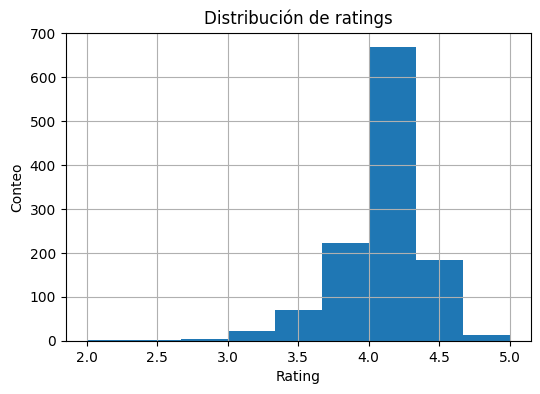

In [944]:
# Histograma
plt.figure(figsize=(6,4))
df_reviews['rating'].hist(bins=9)   # bins para medias estrellas
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.title('Distribución de ratings')
plt.show()


In [945]:
# Conteos y resumen
print(df_reviews['rating'].describe())    # media, std, min, max, etc.

# Ver si hay ceros o valores fuera de rango
print("Valores == 0:", (df_reviews['rating'] == 0).sum())
print("Valores < 1 o > 5:", ((df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)).sum())

# Mostrar ejemplos de filas con rating problemático
display(df_reviews.loc[(df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)].head(10))


count    1185.000000
mean        4.084473
std         0.309580
min         2.000000
25%         3.900000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64
Valores == 0: 0
Valores < 1 o > 5: 0


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count


> Hay una fila con **NaN**, sin embargo, no fue considerado para la estadística básica, _pandas_ omite ese valor, los demás valores (1185 filas) son correctos.

In [946]:
# df_reviews = df_reviews[(df_reviews['rating'] >= 1) & (df_reviews['rating'] <= 5)]

- `Precios → Tenemos preguntas sobre actual_price, discounted_price, discount_percentage. Debemos revisar y eliminar precios negativos o absurdos (ejemplo: actual_price < discounted_price cuando no debería), así como definir un rango realista.`

In [947]:
# Antes de filtrar products
print("Cantidad de filas originales:", len(df_products))

# Filtrar precios positivos
filtro_precios = (df_products['actual_price'] > 0) & (df_products['discounted_price'] > 0)
print("Filas con precios positivos:", filtro_precios.sum())
df_products = df_products[filtro_precios]

# Filtrar precios no absurdos
filtro_umbral = df_products['actual_price'] < 140000  # o el umbral que definas
print("Filas con actual_price < 140000:", filtro_umbral.sum())
df_products = df_products[filtro_umbral]

# Filtrar descuento válido
filtro_descuento = (df_products['discount_percentage'] >= 0) & (df_products['discount_percentage'] <= 100)
print("Filas con descuento válido (0-100%):", filtro_descuento.sum())
df_products = df_products[filtro_descuento]

# Filas finales
print("Cantidad de filas finales:", len(df_products))


Cantidad de filas originales: 1351
Filas con precios positivos: 1351
Filas con actual_price < 140000: 1351
Filas con descuento válido (0-100%): 1351
Cantidad de filas finales: 1351


Nulos en precios:
 actual_price        0
discounted_price    0
dtype: int64

Resumen estadístico:
        actual_price  discounted_price
count    1351.000000       1351.000000
mean     5690.510452       3304.587098
std     11218.918302       7174.024934
min        39.000000         39.000000
25%       899.000000        349.000000
50%      1790.000000        899.000000
75%      4575.000000       2174.000000
max    139900.000000      77990.000000

Precios <= 0:
actual_price        0
discounted_price    0
dtype: int64

Absurdos (discounted > actual): 0


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product


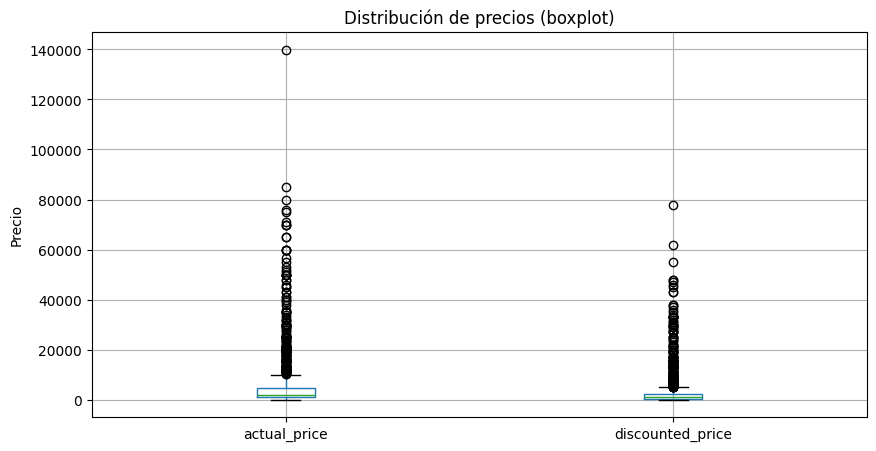

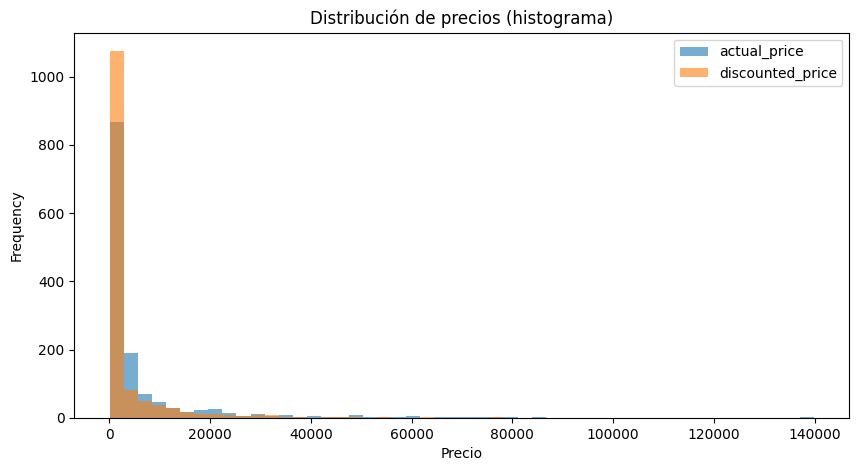

In [948]:
# 1. Revisar valores nulos
print("Nulos en precios:\n", df_products[['actual_price','discounted_price']].isnull().sum())

# 2. Revisar mínimos y máximos
print("\nResumen estadístico:")
print(df_products[['actual_price','discounted_price']].describe())

# 3. Ver cuántos precios negativos o cero
print("\nPrecios <= 0:")
print((df_products[['actual_price','discounted_price']] <= 0).sum())

# 4. Revisar absurdos: cuando el precio con descuento es mayor al original
absurdos = df_products[df_products['discounted_price'] > df_products['actual_price']]
print(f"\nAbsurdos (discounted > actual): {len(absurdos)}")
display(absurdos.head())

# 5. Gráfico: boxplot para ver outliers
plt.figure(figsize=(10,5))
df_products[['actual_price','discounted_price']].boxplot()
plt.title("Distribución de precios (boxplot)")
plt.ylabel("Precio")
plt.show()

# 6. Histograma para ver rango
df_products[['actual_price','discounted_price']].plot(kind='hist', bins=50, alpha=0.6, figsize=(10,5))
plt.title("Distribución de precios (histograma)")
plt.xlabel("Precio")
plt.show()

In [949]:
def detectar_precios_fuera_de_rango(df, precio_max=100000):
    """
    Marca filas con precios sospechosos o descuentos inconsistentes.
    
    Parámetros:
    - df: dataframe con columnas 'actual_price' y 'discounted_price'
    - precio_max: precio máximo considerado razonable
    
    Retorna:
    - df_outliers: dataframe con filas sospechosas
    """
    # Precios fuera de rango
    mask_precio = (df['actual_price'] > precio_max) | (df['discounted_price'] > precio_max)
    
    # Descuento negativo o descuento mayor al precio
    mask_descuento = df['discounted_price'] > df['actual_price']
    
    # Combinar
    mask_sospechoso = mask_precio | mask_descuento
    
    df_outliers = df[mask_sospechoso].copy()
    df_outliers['precio_fuera_rango'] = mask_precio
    df_outliers['descuento_invalido'] = mask_descuento
    
    return df_outliers

# Usar la función
df_outliers = detectar_precios_fuera_de_rango(df_products)
print(df_outliers.to_string())


     product_id                                                                      product_name                                                       category  discounted_price  actual_price  discount_percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

> Distribución
- La gran mayoría de los precios (tanto actual_price como discounted_price) están concentrados en valores bajos (menores a 5,000).
- Existen algunos outliers muy altos (por ejemplo, un actual_price de hasta 139,900 y discounted_price de hasta 77,990).
- Esto genera una cola larga a la derecha en el histograma (distribución sesgada positivamente).

> Consistencia
- No hay nulos en los precios → ✅ limpio en ese aspecto.
- No hay precios <= 0 → ✅ bien.
- No hay casos absurdos (discounted_price > actual_price) → ✅ los descuentos son válidos.

- `rating_count (recuento de calificaciones) → Hay que asegurarse de no contar productos con rating_count = 0 porque no aportan.`

Cantidad de filas originales: 1186


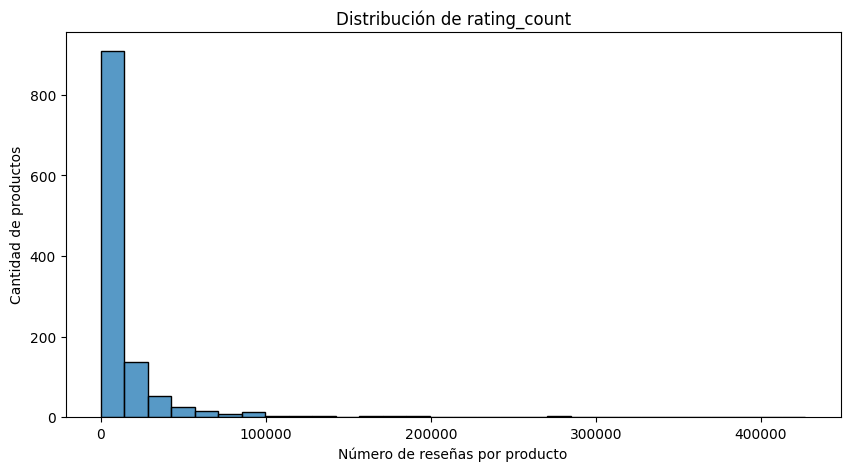

count      1186.000000
mean      14119.381113
std       33015.517039
min           0.000000
25%         925.750000
50%        3739.500000
75%       13155.500000
max      426973.000000
Name: rating_count, dtype: float64


In [950]:
# 1. Cantidad de filas antes de filtrar
print("Cantidad de filas originales:", len(df_reviews))

# 2. Histograma para revisar distribución de rating_count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_reviews['rating_count'], bins=30, kde=False)
plt.title("Distribución de rating_count")
plt.xlabel("Número de reseñas por producto")
plt.ylabel("Cantidad de productos")
plt.show()

# 3. Revisar estadísticas descriptivas
print(df_reviews['rating_count'].describe())


> Distribución
- La gran mayoría de productos tienen pocas reseñas (entre 0 y unos cientos).
- Hay una cola muy larga hacia la derecha, con productos que llegan a tener cientos de miles de reseñas → esto es típico de distribuciones de popularidad (pocos productos muy populares concentran la mayoría de reseñas).
- Es una distribución altamente sesgada positivamente (right-skewed).

> Estadísticos

- Mínimo: 0 (2 productos sin reseñas).
- Mediana (50%): 4,736 → La mitad de los productos tiene ≤ 4,736 reseñas.
- Media (≈ 17,600): mucho más alta que la mediana → hay outliers que inflan el promedio.
- Máximo: 426,973 → un producto extremadamente popular.
- Desviación estándar (≈ 42,120): enorme en relación a la media → confirma la presencia de outliers.

# Unión de tablas 

In [951]:
print(df_reviews.shape)

print(df_products.shape)

(1186, 8)
(1351, 7)


In [952]:
df_merged = pd.merge(
    df_products[['product_id','product_name','category','discounted_price','actual_price','discount_percentage']],
    df_reviews[['product_id','rating','rating_count','review_title','review_content']],
    on='product_id',
    how='inner'  # solo productos que estén en ambos
)

print(df_merged.shape)
df_merged.head()


(1186, 10)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content
0,B00URH5E34,Inventis 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,3.6,13572,"it worked properly for almost one year,ok,USB ...","very good product, very bright, easy to use, i..."
1,B00MFPCY5C,GIZGA essentials Universal Silicone Keyboard P...,Computers&Accessories|Accessories&Peripherals|...,39.0,299.0,87.0,3.5,15233,"Good,Affordable and best,Check the size !,valu...","Value for money,Grt product,Please ensure the ..."
2,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,3.8,3344,"Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q..."
3,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,50.0,50.0,0.0,4.3,5792,"Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho..."
4,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59.0,59.0,0.0,3.8,5958,"Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ..."


Viendo las categorías se decidió agregar una columna nueva donde solo tengamos la categoría principal de cada producto, además de todas las subcategorías como actualmente se tiene 

In [953]:
# Crear columna con la categoría principal (primer nivel antes del primer "|")
df_merged["category_main"] = df_merged["category"].str.split("|").str[0]


In [954]:
# Crear otra columna para obtener marca a partir de product_name, extraer marca como primer palabra del product_name
df_merged['brand'] = df_merged['product_name'].str.split().str[0]

In [955]:
print(df_merged.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'review_title', 'review_content', 'category_main', 'brand'],
      dtype='object')


In [956]:
# Revisar los top 20 valores únicos
print(df_merged['brand'].value_counts().head(20))

brand
boAt            38
Bajaj           26
AmazonBasics    21
Amazon          21
Portronics      21
HP              20
Havells         19
Philips         18
Noise           16
Samsung         16
Zebronics       15
Crompton        15
Duracell        15
Logitech        15
Prestige        14
ZEBRONICS       14
KENT            13
TP-Link         13
AGARO           13
Ambrane         12
Name: count, dtype: int64


In [957]:
df_merged.shape

(1186, 12)

## Guardo mis versiones limpias y la unión de tablas

In [958]:
import os

# Crear carpeta si no existe
os.makedirs("../data_limpia", exist_ok=True)

# Guardar productos limpios
df_products.to_csv("../data_limpia/productos_limpios.csv", index=False, encoding="utf-8")

# Guardar reseñas limpias
df_reviews.to_csv("../data_limpia/reseñas_limpias.csv", index=False, encoding="utf-8")

# Guardar tabla combinada
df_merged.to_csv("../data_limpia/productos_reseñas.csv", index=False, encoding="utf-8")

# **Análisis exploratorio**

In [959]:
# ====================================
# Análisis Exploratorio de Datos (EDA)
# ====================================

# 1. Información general
print("Dimensiones del dataset:", df_merged.shape)
print("\nTipos de datos y nulos:")
print(df_merged.info())
print("\nResumen estadístico (numéricas):")
print(df_merged.describe())



Dimensiones del dataset: (1186, 12)

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1186 non-null   object 
 1   product_name         1186 non-null   object 
 2   category             1186 non-null   object 
 3   discounted_price     1186 non-null   float64
 4   actual_price         1186 non-null   float64
 5   discount_percentage  1186 non-null   float64
 6   rating               1185 non-null   float64
 7   rating_count         1186 non-null   int64  
 8   review_title         1186 non-null   object 
 9   review_content       1186 non-null   object 
 10  category_main        1186 non-null   object 
 11  brand                1186 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 111.3+ KB
None

Resumen estadístico (numéricas):
       discounted_price   act

## Visualizar distribuciones

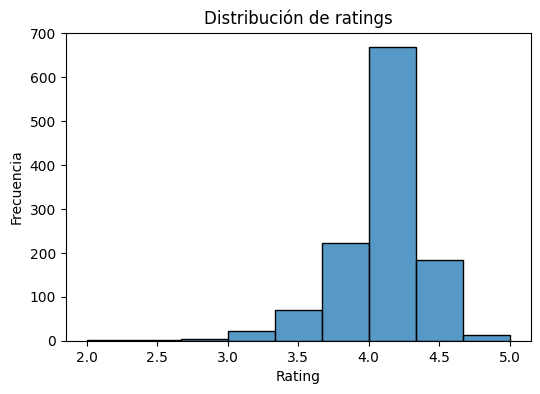

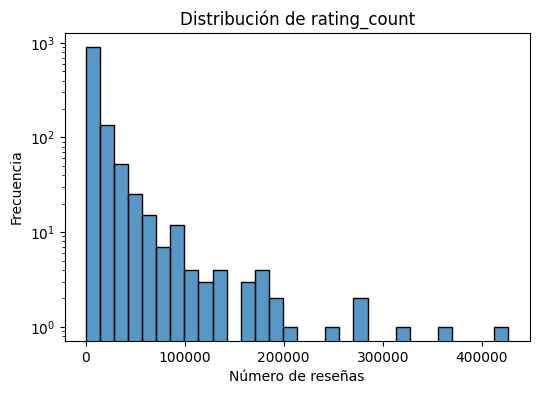

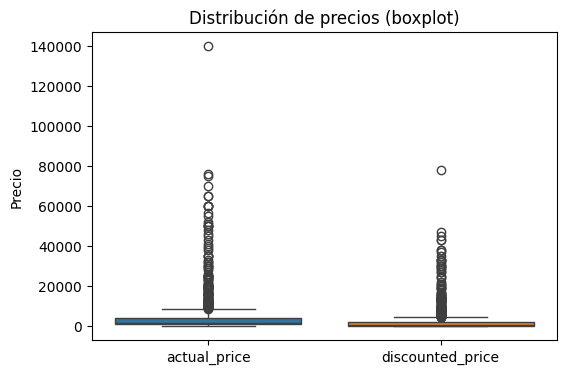

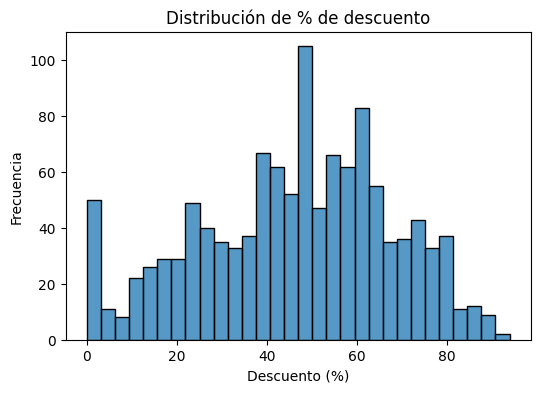

In [960]:
# 2. Distribución de variables clave
plt.figure(figsize=(6,4))
sns.histplot(df_merged['rating'], bins=9, kde=False)
plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_merged['rating_count'], bins=30, kde=False)
plt.title("Distribución de rating_count")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia")
plt.yscale("log")  # útil si hay valores muy altos
plt.show()

# Medidas de dispersión
plt.figure(figsize=(6,4))
sns.boxplot(data=df_merged[['actual_price','discounted_price']])
plt.title("Distribución de precios (boxplot)")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_merged['discount_percentage'], bins=30, kde=False)
plt.title("Distribución de % de descuento")
plt.xlabel("Descuento (%)")
plt.ylabel("Frecuencia")
plt.show()

Agrupamos por una variable categórica (category), pero lo que resumimos dentro de cada grupo son variables numéricas (rating, rating_count, actual_price, etc.).

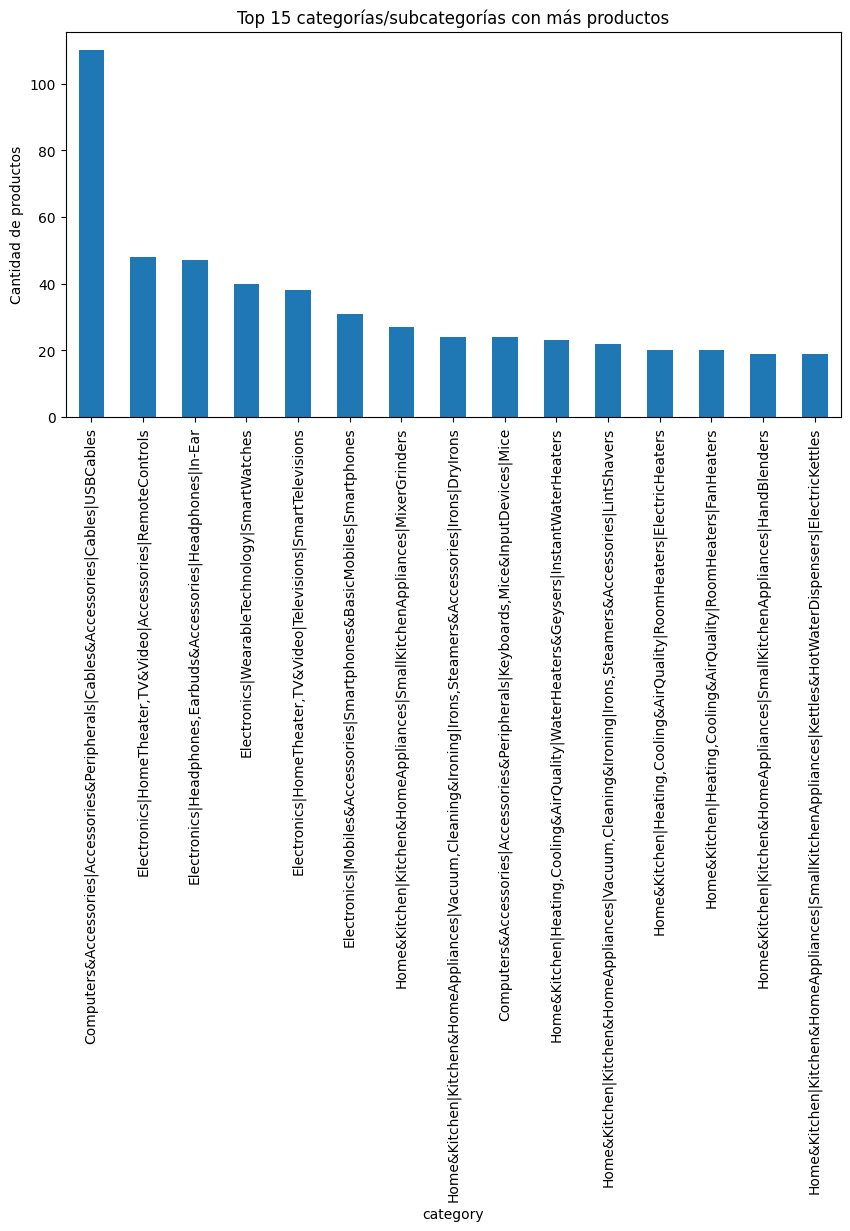

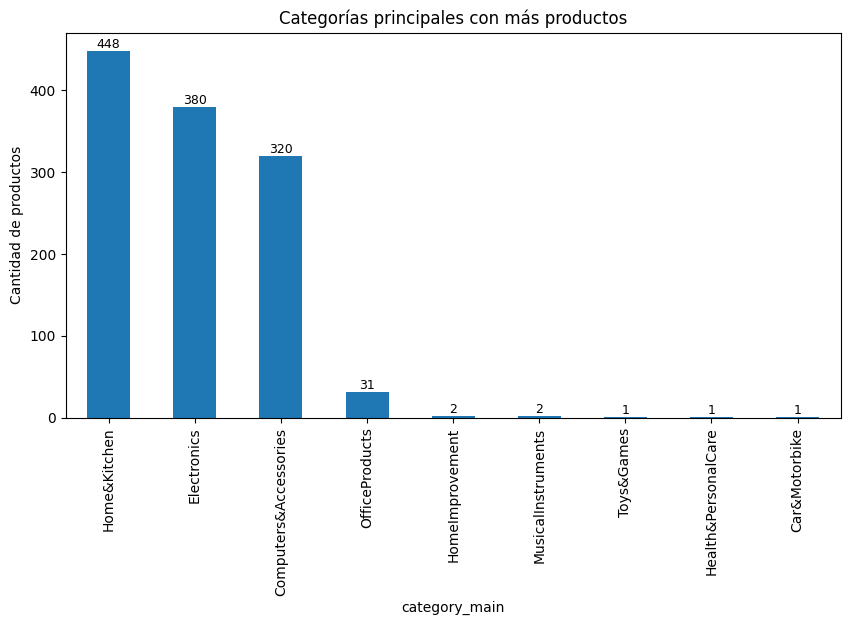

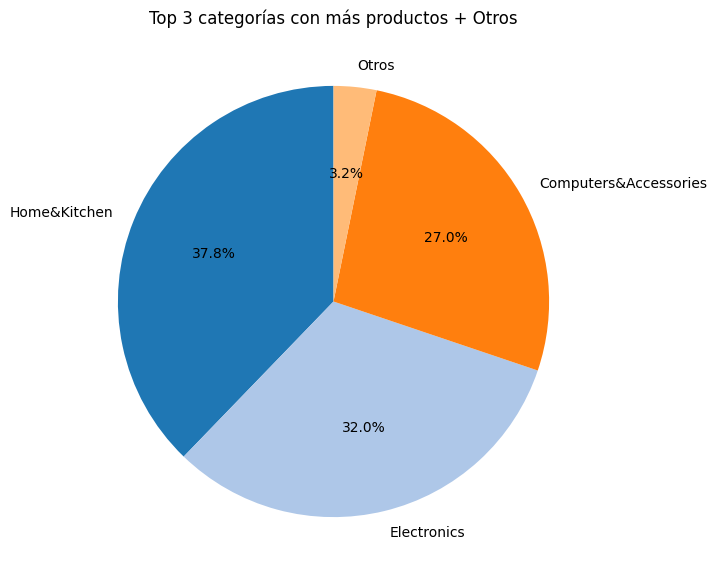

Categorías principales: 
Número de categorías únicas: 9
Categorías más comunes:
 category_main
Home&Kitchen             448
Electronics              380
Computers&Accessories    320
OfficeProducts            31
HomeImprovement            2
MusicalInstruments         2
Toys&Games                 1
Health&PersonalCare        1
Car&Motorbike              1
Name: count, dtype: int64

Resumen por categoría (promedios y sumas):


,rating,rating_count,actual_price,discounted_price,discount_percentage
category_main,,,,,
OfficeProducts,4.309677,149675,397.193548,301.580645,12.354839
Toys&Games,4.300000,15867,150.000000,150.000000,0.000000
HomeImprovement,4.250000,8566,799.000000,337.000000,57.500000
Computers&Accessories,4.151562,4917222,1998.965500,1038.822062,51.787500
Electronics,4.061579,8569524,8282.155263,4649.528947,51.892105
Home&Kitchen,4.040716,2991069,4162.073661,2330.615647,40.120536
Health&PersonalCare,4.000000,3663,1900.000000,899.000000,53.000000
MusicalInstruments,3.900000,88882,1347.000000,638.000000,46.000000
Car&Motorbike,3.800000,1118,4000.000000,2339.000000,42.000000


In [964]:
# 3. Análisis categórico
# Visualizar variables categóricas
plt.figure(figsize=(10,5))
df_merged['category'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 categorías/subcategorías con más productos")
plt.ylabel("Cantidad de productos")
plt.show()

plt.figure(figsize=(10,5))
ax = df_merged['category_main'].value_counts().head(15).plot(kind='bar')

plt.title("Categorías principales con más productos")
plt.ylabel("Cantidad de productos")

# 🔹 Agregar valores arriba de las barras
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),                # valor
        (p.get_x() + p.get_width() / 2,     # posición X (centro de la barra)
         p.get_height()),                   # posición Y (altura de la barra)
        ha='center', va='bottom', fontsize=9
    )

plt.savefig("../visualizaciones/categorias.png", bbox_inches="tight")
plt.show()

import matplotlib.pyplot as plt

# Contar categorías
conteo = df_merged['category_main'].value_counts()

# Tomar las 3 primeras
top3 = conteo.head(3)

# Agrupar el resto como "Otros"
otros = pd.Series(conteo.iloc[3:].sum(), index=["Otros"])

# Unir top3 + otros
data_pie = pd.concat([top3, otros])

# Gráfico de pastel
plt.figure(figsize=(7,7))
data_pie.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors  # paleta amplia
)
plt.title("Top 3 categorías con más productos + Otros")
plt.ylabel("")  # quita etiqueta eje Y
plt.savefig("../visualizaciones/top3categoriasproductos.png")
plt.show()



# Categorías principales
print("Categorías principales: ")
print("Número de categorías únicas:", df_merged['category_main'].nunique())
print("Categorías más comunes:\n", df_merged['category_main'].value_counts())

# Agrupar datos según variables categóricas
cat_summary = df_merged.groupby('category_main').agg({
    'rating':'mean', # promedio de calificación
    'rating_count':'sum', # suma de reseñas
    'actual_price':'mean', # promedio de precio original
    'discounted_price':'mean', # promedio de precio con descuento
    'discount_percentage':'mean' # promedio de porcentaje de descuento
}).sort_values(by='rating', ascending=False)


# Medidas de tendencia central
print("\nResumen por categoría (promedios y sumas):")
display(cat_summary.head(10))



            category_main          brand  cantidad_productos  rating_promedio
0           Car&Motorbike        Reffair                   1         3.800000
1   Computers&Accessories             HP                  18         4.111111
2   Computers&Accessories     Portronics                  16         4.150000
3   Computers&Accessories       Logitech                  14         4.407143
4   Computers&Accessories         Amazon                  12         4.108333
5   Computers&Accessories        TP-Link                  12         4.316667
6             Electronics           boAt                  29         4.055172
7             Electronics          Noise                  16         3.956250
8             Electronics        Samsung                  14         4.200000
9             Electronics        7SEVEN®                  11         3.700000
10            Electronics          Boult                  11         3.772727
11    Health&PersonalCare             Dr                   1    

C:\Users\user\AppData\Local\Temp\ipykernel_7152\3289476657.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_categoria = top_marcas_por_categoria.groupby("category_main").apply(


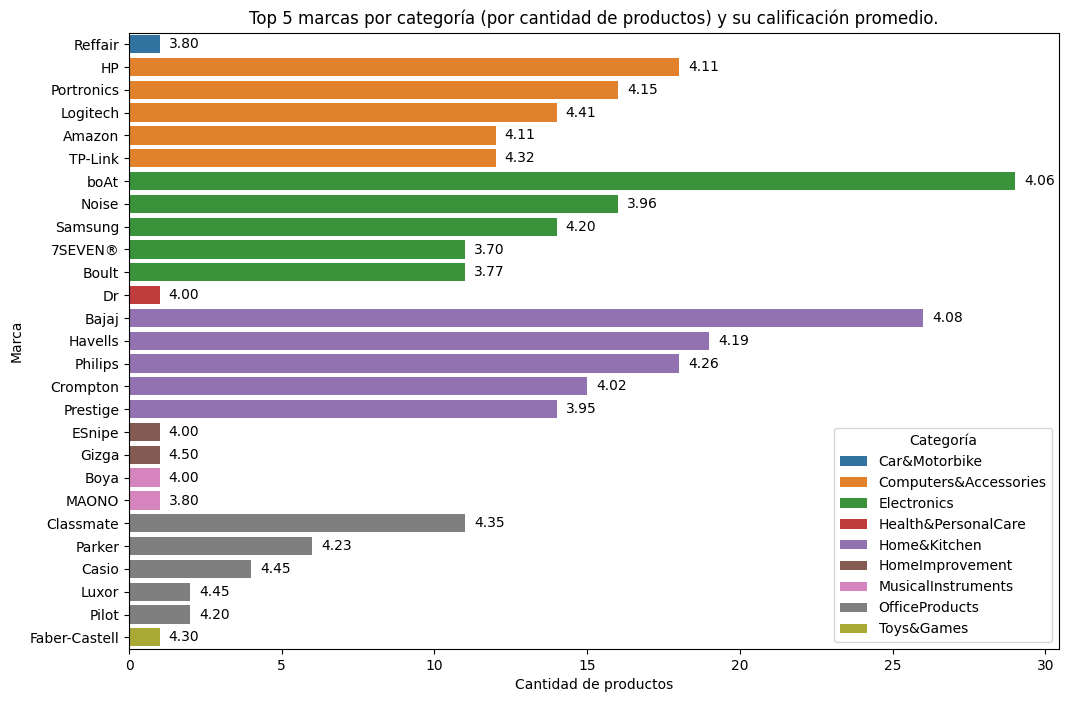

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por categoría y marca
top_marcas_por_categoria = (
    df_merged.groupby(["category_main", "brand"])
    .agg(
        cantidad_productos=("product_id", "nunique"),
        rating_promedio=("rating", "mean")
    )
    .reset_index()
)

# Top 5 marcas por categoría según cantidad de productos
top5_por_categoria = top_marcas_por_categoria.groupby("category_main").apply(
    lambda x: x.nlargest(5, "cantidad_productos")
).reset_index(drop=True)

print(top5_por_categoria)

# Gráfico de barras
plt.figure(figsize=(12,8))
ax = sns.barplot(
    x="cantidad_productos",
    y="brand",
    hue="category_main",
    data=top5_por_categoria,
    dodge=False
)
plt.xlabel("Cantidad de productos")
plt.ylabel("Marca")
plt.title("Top 5 marcas por categoría (por cantidad de productos) y su calificación promedio.")
plt.legend(title="Categoría")

# Agregar rating promedio sobre cada barra
for p, rating in zip(ax.patches, top5_por_categoria["rating_promedio"]):
    width = p.get_width()      # ancho de la barra
    ax.text(width + 0.3, p.get_y() + p.get_height()/2,  # posición
            f"{rating:.2f}", 
            va='center', 
            fontsize=10)

plt.savefig("../visualizaciones/top5_por_categoria.png")
plt.show()


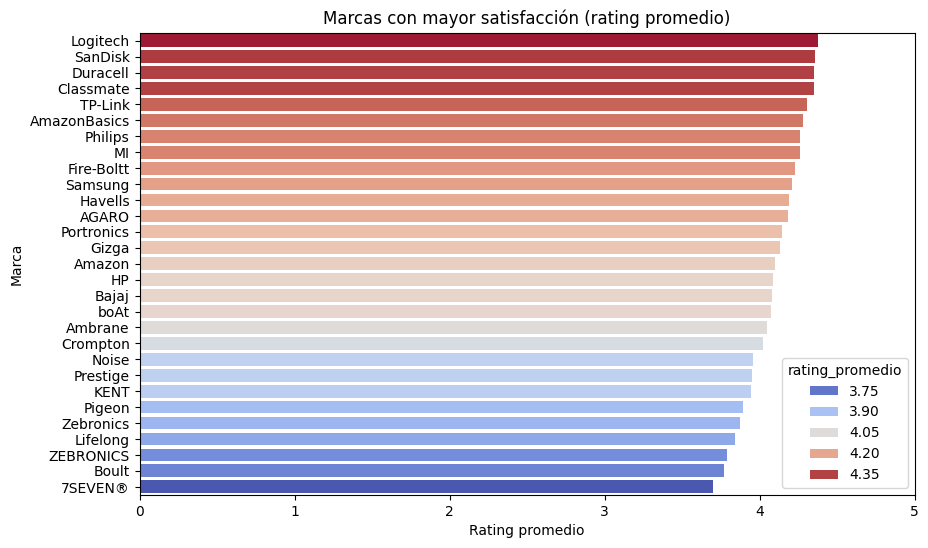

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por marca y calcular promedio de rating y cantidad de reviews
rating_por_marca = df_merged.groupby("brand").agg(
    rating_promedio=("rating", "mean"),
    cantidad_reviews=("rating", "count")
).sort_values(by="rating_promedio", ascending=False)

# Filtrar marcas con pocas reseñas para evitar promedios poco confiables (opcional)
rating_por_marca = rating_por_marca[rating_por_marca["cantidad_reviews"] >= 10]

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(
    x="rating_promedio",
    y=rating_por_marca.index,
    data=rating_por_marca,
    hue="rating_promedio",
    palette="coolwarm"
)
plt.xlabel("Rating promedio")
plt.ylabel("Marca")
plt.title("Marcas con mayor satisfacción (rating promedio)")
plt.xlim(0, 5)  # Si tu rating va de 1 a 5
plt.savefig("../visualizaciones/marcas_satisfaccion.png")
plt.show()


              cantidad_productos  rating_promedio
brand                                            
boAt                          38         4.076316
Bajaj                         26         4.080769
Portronics                    21         4.147619
AmazonBasics                  21         4.280952
Amazon                        21         4.100000
HP                            20         4.085000
Havells                       19         4.189474
Philips                       18         4.261111
Noise                         16         3.956250
Samsung                       16         4.212500
Crompton                      15         4.020000
Zebronics                     15         3.873333
Duracell                      15         4.353333
Logitech                      15         4.380000
ZEBRONICS                     14         3.792857


C:\Users\user\AppData\Local\Temp\ipykernel_7152\459605245.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


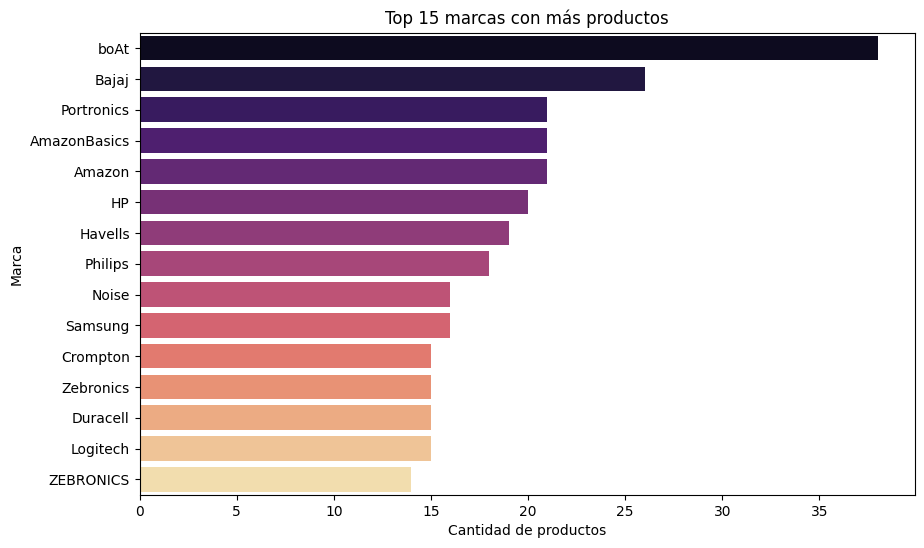

C:\Users\user\AppData\Local\Temp\ipykernel_7152\459605245.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


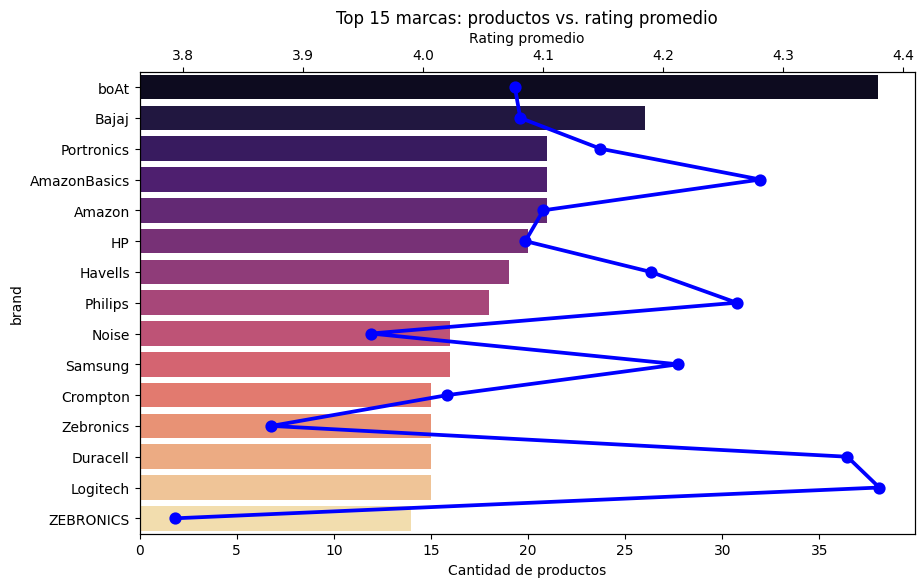

In [ ]:
import pandas as pd

# Contar cuántos productos únicos tiene cada marca
productos_por_marca = df_merged.groupby("brand").agg(
    cantidad_productos=("product_id", "nunique"),
    rating_promedio=("rating", "mean")
).sort_values(by="cantidad_productos", ascending=False).head(15)

print(productos_por_marca)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x="cantidad_productos",
    y=productos_por_marca.index,
    data=productos_por_marca,
    palette="magma"
)
plt.xlabel("Cantidad de productos")
plt.ylabel("Marca")
plt.title("Top 15 marcas con más productos")
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))

# Barras para cantidad de productos
sns.barplot(
    data=productos_por_marca,
    x="cantidad_productos",
    y=productos_por_marca.index,
    palette="magma",
    ax=ax1
)

# Línea para rating promedio (eje secundario)
ax2 = ax1.twiny()
sns.pointplot(
    data=productos_por_marca,
    x="rating_promedio",
    y=productos_por_marca.index,
    color="blue",
    ax=ax2
)

ax1.set_xlabel("Cantidad de productos")
ax2.set_xlabel("Rating promedio")
plt.title("Top 15 marcas: productos vs. rating promedio")
plt.savefig("../visualizaciones/productos_vs_rating.png")
plt.show()



In [ ]:
# 4. Relaciones entre variables
print(df_merged.describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1186.000000    1186.000000          1186.000000  1185.000000   
mean        2662.771391    4784.276526            46.332209     4.084473   
std         5951.651328    9937.733975            21.469301     0.309580   
min           39.000000      39.000000             0.000000     2.000000   
25%          349.000000     880.000000            31.000000     3.900000   
50%          817.000000    1695.000000            49.000000     4.100000   
75%         1999.000000    3990.000000            62.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1186.000000  
mean    14119.381113  
std     33015.517039  
min         0.000000  
25%       925.750000  
50%      3739.500000  
75%     13155.500000  
max    426973.000000  


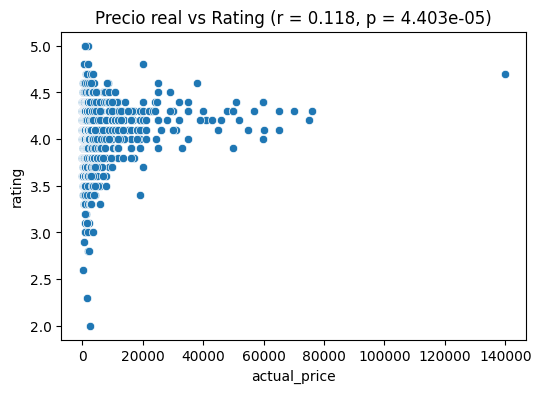

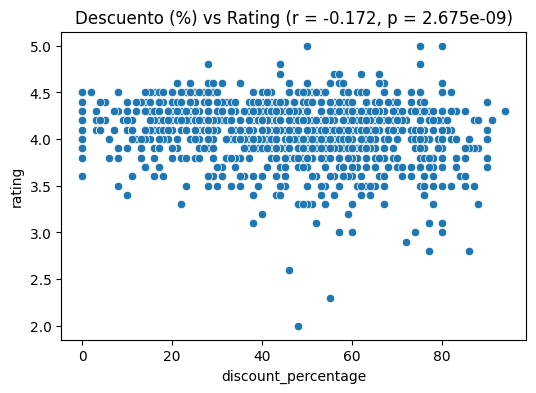

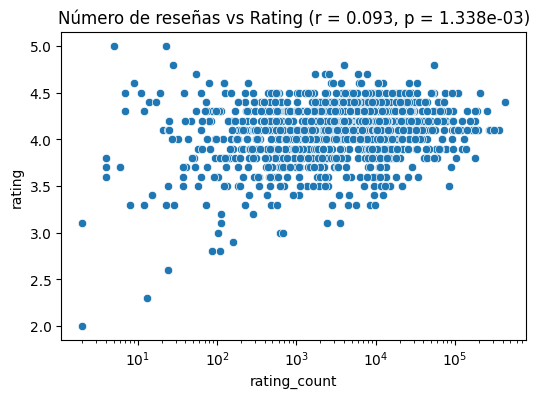

In [965]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# 1. Precio real vs Rating
x = df_merged["actual_price"]
y = df_merged["rating"]

# Eliminar NaN
mask = (~np.isnan(x)) & (~np.isnan(y))
x_clean, y_clean = x[mask], y[mask]

r, p_value = pearsonr(x_clean, y_clean)

plt.figure(figsize=(6,4))
sns.scatterplot(x=x_clean, y=y_clean)
plt.title(f"Precio real vs Rating (r = {r:.3f}, p = {p_value:.3e})")
plt.show()

# 2. Descuento (%) vs Rating
x = df_merged["discount_percentage"]
y = df_merged["rating"]

mask = (~np.isnan(x)) & (~np.isnan(y))
x_clean, y_clean = x[mask], y[mask]

r, p_value = pearsonr(x_clean, y_clean)

plt.figure(figsize=(6,4))
sns.scatterplot(x=x_clean, y=y_clean)
plt.title(f"Descuento (%) vs Rating (r = {r:.3f}, p = {p_value:.3e})")
plt.savefig("../visualizaciones/descuento_vs_rating.png")
plt.show()

# 3. Número de reseñas vs Rating (escala log)
x = df_merged["rating_count"]
y = df_merged["rating"]

mask = (~np.isnan(x)) & (~np.isnan(y))
x_clean, y_clean = x[mask], y[mask]

r, p_value = pearsonr(x_clean, y_clean)

plt.figure(figsize=(6,4))
sns.scatterplot(x=x_clean, y=y_clean)
plt.xscale("log")
plt.title(f"Número de reseñas vs Rating (r = {r:.3f}, p = {p_value:.3e})")
plt.show()


In [ ]:
# 5. Tablas resumen

# Filtrar productos con al menos una reseña
df_valid_ratings = df_merged[df_merged['rating_count'] > 0]

# Top 10 productos mejor calificados
print("\nTop 10 productos mejor calificados:")
display(df_valid_ratings[['product_name','category','rating','rating_count']]
        .sort_values(by='rating', ascending=False)
        .head(10))


print("\nTop 10 productos con más reseñas:")
display(df_merged[['product_name','category','rating','rating_count']].sort_values(by='rating_count', ascending=False).head(10))

print("\nCategorías con mayor descuento promedio:")
display(cat_summary.sort_values(by='discount_percentage', ascending=False).head(10))


Top 10 productos mejor calificados:


,product_name,category,rating,rating_count
429,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,5.0,23
360,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,5.0,5
779,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8,53803
217,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,28
1037,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,3964
795,Campfire Spring Chef Prolix Instant Portable W...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.7,2591
654,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,4.7,7779
540,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,1729
539,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,2300
418,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,54



Top 10 productos con más reseñas:


,product_name,category,rating,rating_count
156,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",4.4,426973
297,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,363713
1097,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,4.1,313836
547,boAt Bassheads 225 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,273189
137,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,4.1,270563
225,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories|ExternalDevices&DataStor...,4.3,253105
627,SanDisk Extreme SD UHS I 64GB Card for 4K Vide...,Electronics|Accessories|MemoryCards|MicroSD,4.5,205052
487,"JBL C100SI Wired In Ear Headphones with Mic, J...","Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,192590
473,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,Computers&Accessories|ExternalDevices&DataStor...,4.3,189104
742,boAt Airdopes 121v2 in-Ear True Wireless Earbu...,"Electronics|Headphones,Earbuds&Accessories|Hea...",3.8,180998



Categorías con mayor descuento promedio:


,rating,rating_count,actual_price,discounted_price,discount_percentage
category_main,,,,,
HomeImprovement,4.250000,8566,799.000000,337.000000,57.500000
Health&PersonalCare,4.000000,3663,1900.000000,899.000000,53.000000
Electronics,4.061579,8569524,8282.155263,4649.528947,51.892105
Computers&Accessories,4.151562,4917222,1998.965500,1038.822062,51.787500
MusicalInstruments,3.900000,88882,1347.000000,638.000000,46.000000
Car&Motorbike,3.800000,1118,4000.000000,2339.000000,42.000000
Home&Kitchen,4.040716,2991069,4162.073661,2330.615647,40.120536
OfficeProducts,4.309677,149675,397.193548,301.580645,12.354839
Toys&Games,4.300000,15867,150.000000,150.000000,0.000000


# Segmentacion 
creamos una nueva columna _price_segment_ en **df_merged** para dividir _actual_price_ en grupos:

- Baratos (p25–p50).
- Medios (p50–p75).
- Caros (p75–p100)

In [ ]:
p25 = df_merged['actual_price'].quantile(0.25)
p50 = df_merged['actual_price'].quantile(0.50)
p75 = df_merged['actual_price'].quantile(0.75)
iqr = p75 - p25
limite_superior = p75 + 1.5 * iqr



def segmentar_precio(x):
    if x < p25:
        return "Bajo"
    elif p25 <= x < p50:
        return "Medio-bajo"
    elif p50 <= x < p75:
        return "Medio-alto"
    elif p75 <= x <= limite_superior:
        return "Alto"
    else:
        return "Premium"

df_merged['price_segment'] = df_merged['actual_price'].apply(segmentar_precio)

print(df_merged['price_segment'].value_counts())



price_segment
Bajo          297
Medio-bajo    294
Medio-alto    293
Alto          151
Premium       151
Name: count, dtype: int64


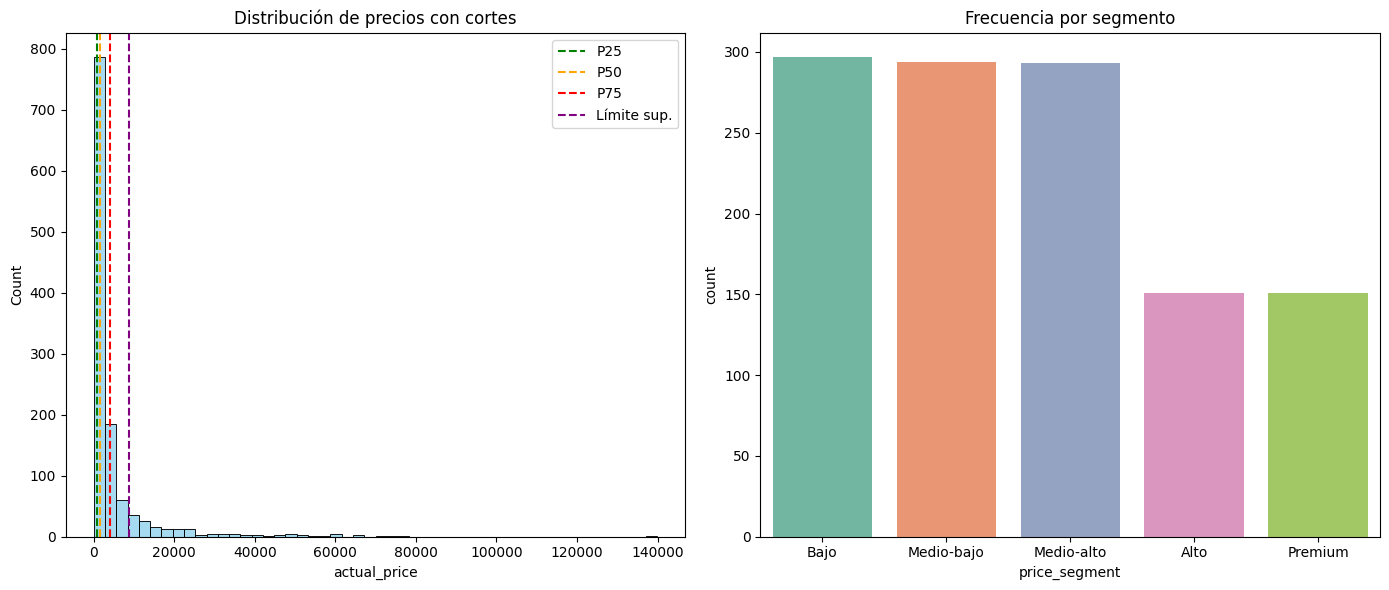

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cálculo de cuartiles e IQR ---
p25 = df_merged['actual_price'].quantile(0.25)
p50 = df_merged['actual_price'].quantile(0.50)
p75 = df_merged['actual_price'].quantile(0.75)
iqr = p75 - p25
limite_superior = p75 + 1.5 * iqr

# --- Segmentación ---
def segmentar_precio(x):
    if x < p25:
        return "Bajo"
    elif p25 <= x < p50:
        return "Medio-bajo"
    elif p50 <= x < p75:
        return "Medio-alto"
    elif p75 <= x <= limite_superior:
        return "Alto"
    else:
        return "Premium"

df_merged['price_segment'] = df_merged['actual_price'].apply(segmentar_precio)

# --- Crear figura con 2 gráficos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Histograma de precios
sns.histplot(df_merged['actual_price'], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de precios con cortes")

# Líneas verticales en los percentiles y límite
for value, label, color in [(p25, "P25", "green"), 
                            (p50, "P50", "orange"), 
                            (p75, "P75", "red"), 
                            (limite_superior, "Límite sup.", "purple")]:
    axes[0].axvline(value, color=color, linestyle="--", linewidth=1.5, label=label)

axes[0].legend()

# 2. Gráfico de barras de segmentos
sns.countplot(data=df_merged, x="price_segment", order=["Bajo", "Medio-bajo", "Medio-alto", "Alto", "Premium"], ax=axes[1], palette="Set2", hue="price_segment")
axes[1].set_title("Frecuencia por segmento")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Cuartiles e IQR
p25 = df_merged['actual_price'].quantile(0.25)
p50 = df_merged['actual_price'].quantile(0.50)
p75 = df_merged['actual_price'].quantile(0.75)
iqr = p75 - p25
limite_superior = p75 + 1.5 * iqr

# Construcción de la tabla
segmentos = {
    "Bajo": [df_merged['actual_price'].min(), p25],
    "Medio-bajo": [p25, p50],
    "Medio-alto": [p50, p75],
    "Alto": [p75, limite_superior],
    "Premium": [limite_superior, df_merged['actual_price'].max()]
}

tabla_segmentos = pd.DataFrame(segmentos, index=["Desde", "Hasta"]).T

print("📊 Rangos de precios por segmento:")
print(tabla_segmentos)


📊 Rangos de precios por segmento:
             Desde     Hasta
Bajo          39.0     880.0
Medio-bajo   880.0    1695.0
Medio-alto  1695.0    3990.0
Alto        3990.0    8655.0
Premium     8655.0  139900.0


In [ ]:
# Resumen por segmento
segment_summary = df_merged.groupby('price_segment').agg({
    'rating':'mean',
    'rating_count':'sum',
    'discount_percentage':'mean',
    'actual_price':'mean'
}).sort_values(by='actual_price')

print(segment_summary)


                 rating  rating_count  discount_percentage  actual_price
price_segment                                                           
Bajo           4.087205       3736154            40.521886    500.333333
Medio-bajo     4.075510       4567309            53.248299   1203.207483
Medio-alto     4.060274       4127680            45.658703   2509.791809
Alto           4.054305       2636310            49.900662   5543.145430
Premium        4.173510       1678133            42.033113  23837.258278


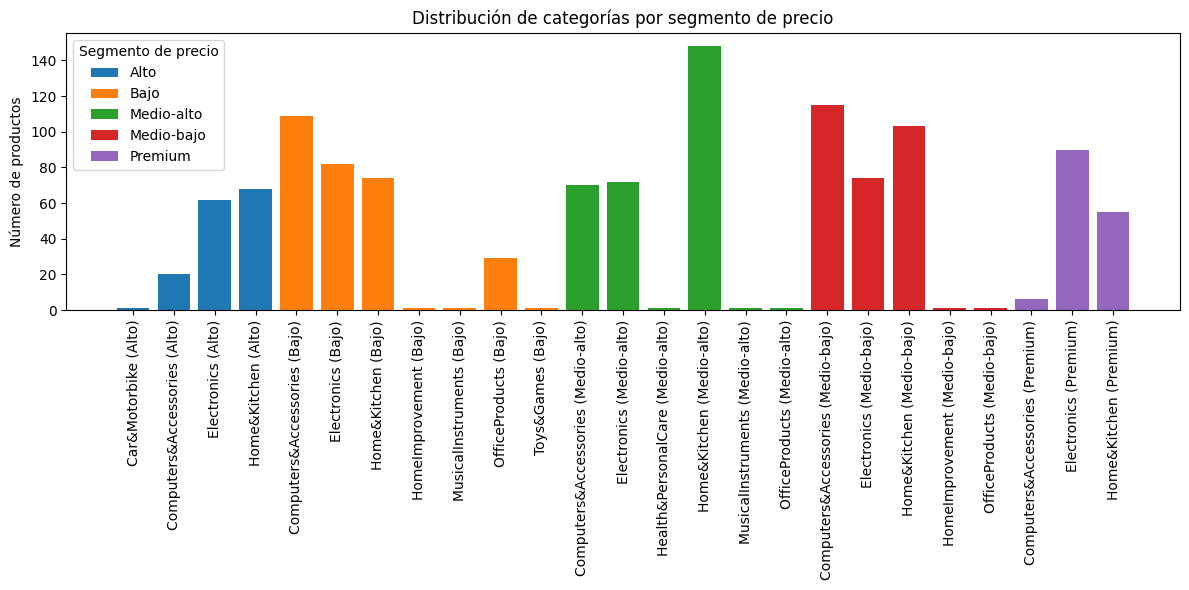

In [ ]:
import matplotlib.pyplot as plt

# Conteo de productos por segmento y categoría
conteo = df_merged.groupby(["price_segment", "category_main"])["product_id"].count().reset_index()

# Renombrar columna para claridad
conteo = conteo.rename(columns={"product_id": "count"})

# --- GRAFICAR ---
plt.figure(figsize=(12,6))

# Gráfico de barras agrupadas (categorías dentro de cada price_segment)
for i, segment in enumerate(conteo["price_segment"].unique()):
    subset = conteo[conteo["price_segment"] == segment]
    plt.bar(subset["category_main"] + " (" + segment + ")", subset["count"], label=segment)

plt.xticks(rotation=90)
plt.ylabel("Número de productos")
plt.title("Distribución de categorías por segmento de precio")
plt.legend(title="Segmento de precio")
plt.tight_layout()
plt.show()


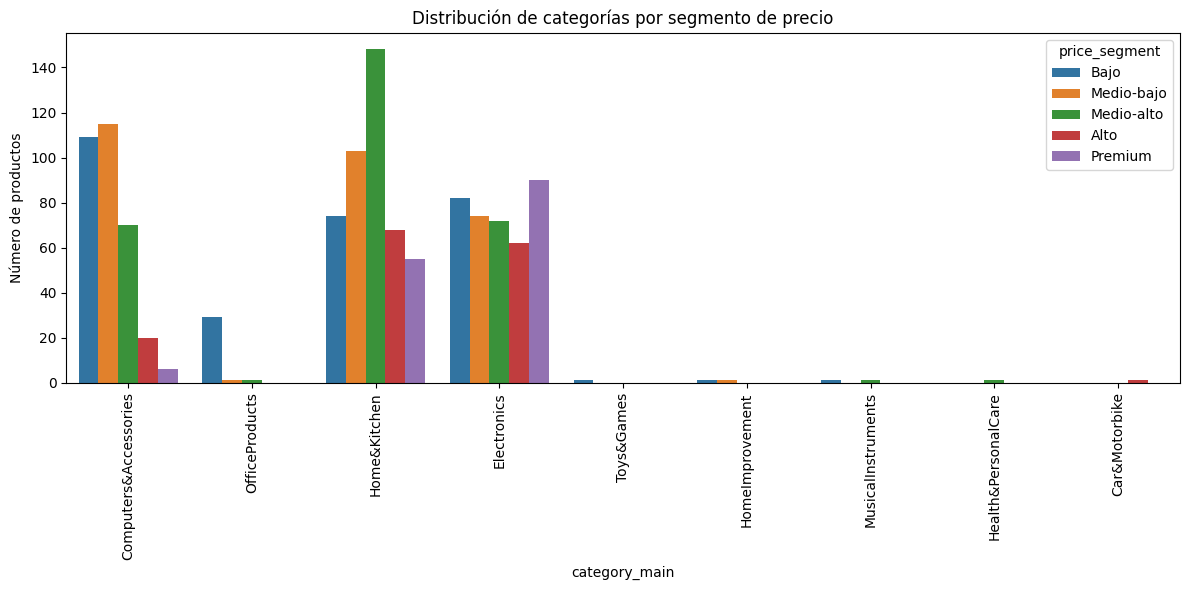

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df_merged, x="category_main", hue="price_segment")

plt.xticks(rotation=90)
plt.ylabel("Número de productos")
plt.title("Distribución de categorías por segmento de precio")
plt.tight_layout()
plt.show()


In [ ]:
# Calcular promedio de rating por marca y segmento económico
top_marcas_segmento = (
    df_merged.groupby(["price_segment", "brand"])["rating"]
    .mean()
    .reset_index()
)

# Ordenar dentro de cada segmento y quedarnos con el top 5
top_marcas_segmento = (
    top_marcas_segmento
    .sort_values(["price_segment", "rating"], ascending=[True, False])
    .groupby("price_segment")
    .head(5)
)

print(top_marcas_segmento)


    price_segment            brand  rating
67           Alto           WeCool    4.60
58           Alto           Sujata    4.55
49           Alto           Realme    4.50
57           Alto          Seagate    4.50
6            Alto          Balzano    4.40
176          Bajo          Oratech    4.80
85           Bajo          AirCase    4.50
97           Bajo           Belkin    4.50
114          Bajo             Dell    4.50
133          Bajo         Fujifilm    4.50
356    Medio-alto         Syncwire    5.00
354    Medio-alto          Swiffer    4.80
265    Medio-alto         Campfire    4.70
237    Medio-alto              10k    4.60
318    Medio-alto           Melbon    4.60
497    Medio-bajo          REDTECH    5.00
426    Medio-bajo          FIGMENT    4.70
471    Medio-bajo  Multifunctional    4.70
527    Medio-bajo          VRPRIME    4.60
539    Medio-bajo           Zuvexa    4.55
571       Premium          Instant    4.80
597       Premium             Sony    4.70
551       P

In [ ]:
# Calcular promedio de rating por marca y categoría
top_marcas_categoria = (
    df_merged.groupby(["category_main", "brand"])["rating"]
    .mean()
    .reset_index()
)

# Ordenar dentro de cada categoría y quedarnos con el top 5
top_marcas_categoria = (
    top_marcas_categoria
    .sort_values(["category_main", "rating"], ascending=[True, False])
    .groupby("category_main")
    .head(5)
)

print(top_marcas_categoria)


             category_main          brand    rating
0            Car&Motorbike        Reffair  3.800000
76   Computers&Accessories        REDTECH  5.000000
95   Computers&Accessories       Syncwire  5.000000
25   Computers&Accessories          Cuzor  4.500000
80   Computers&Accessories       Redragon  4.500000
88   Computers&Accessories       Scarters  4.500000
126            Electronics            10k  4.600000
233            Electronics         Spigen  4.550000
138            Electronics         Belkin  4.500000
166            Electronics       Fujifilm  4.500000
168            Electronics      Goldmedal  4.500000
266    Health&PersonalCare             Dr  4.000000
347           Home&Kitchen        Instant  4.800000
390           Home&Kitchen        Oratech  4.800000
430           Home&Kitchen        Swiffer  4.800000
303           Home&Kitchen       Campfire  4.700000
322           Home&Kitchen        FIGMENT  4.700000
461        HomeImprovement          Gizga  4.500000
460        H

  price_segment          category_main    brand  rating
0          Alto          Car&Motorbike  Reffair    3.80
1          Alto  Computers&Accessories  Seagate    4.50
2          Alto  Computers&Accessories    Wacom    4.40
3          Alto  Computers&Accessories  Western    4.40
4          Alto            Electronics   WeCool    4.60
5          Alto            Electronics   Realme    4.50
6          Alto            Electronics  KINGONE    4.40
7          Alto           Home&Kitchen   Sujata    4.55
8          Alto           Home&Kitchen  Balzano    4.40
9          Alto           Home&Kitchen   SUJATA    4.40


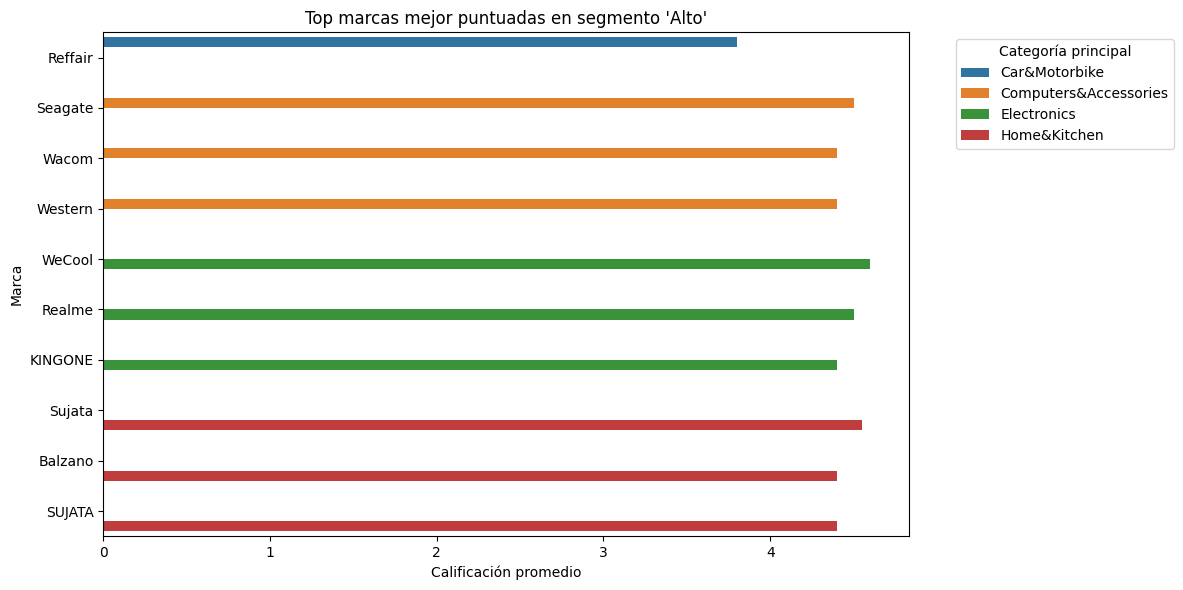

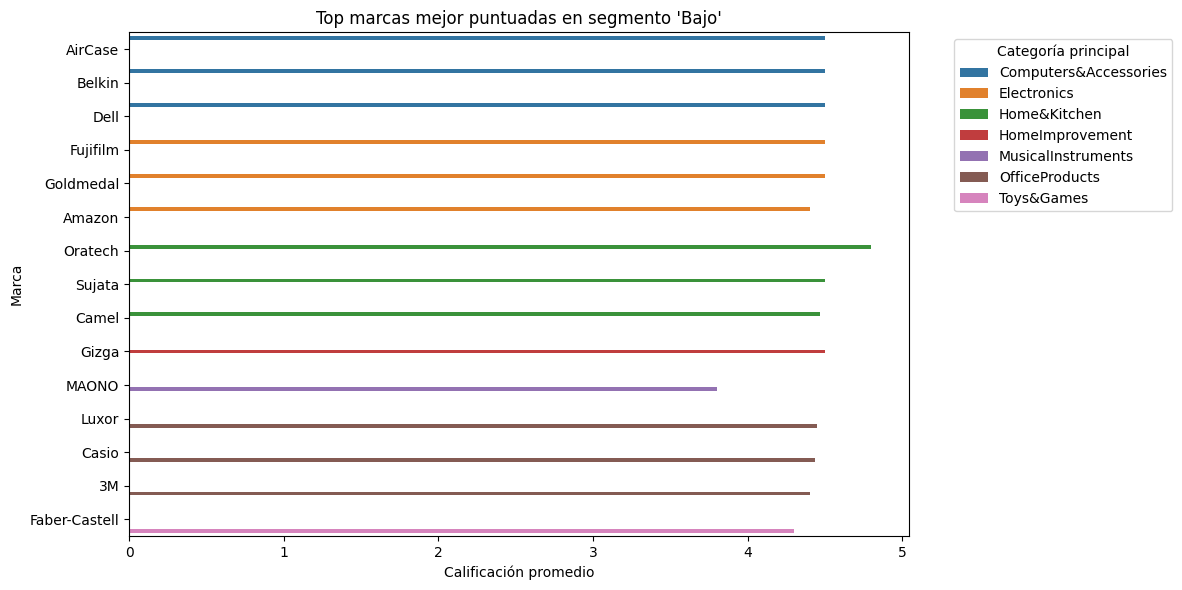

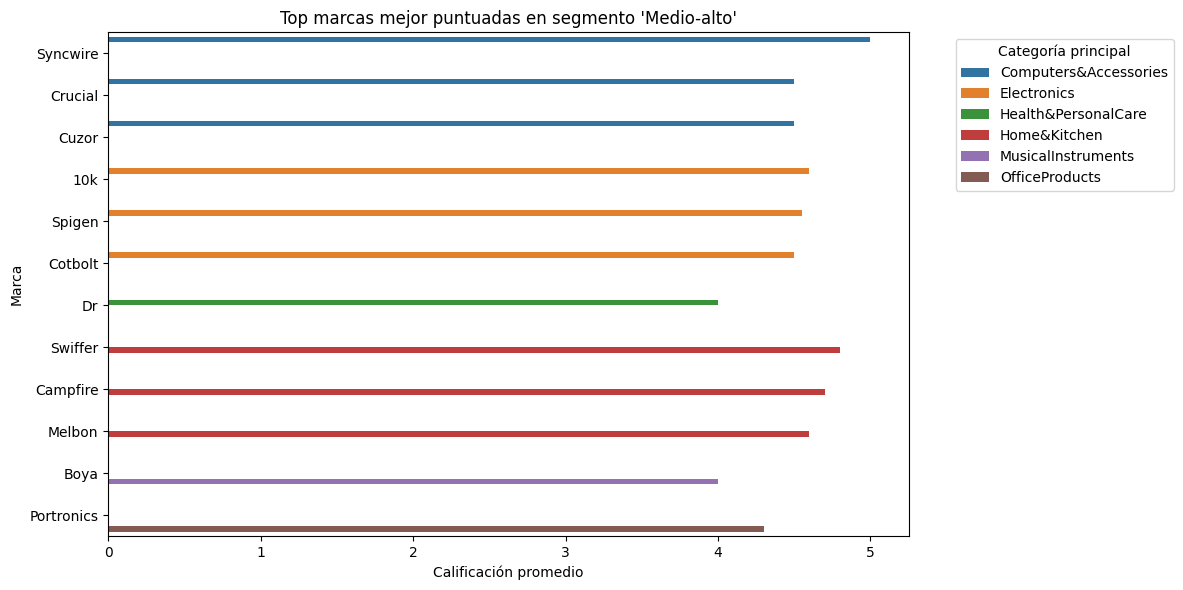

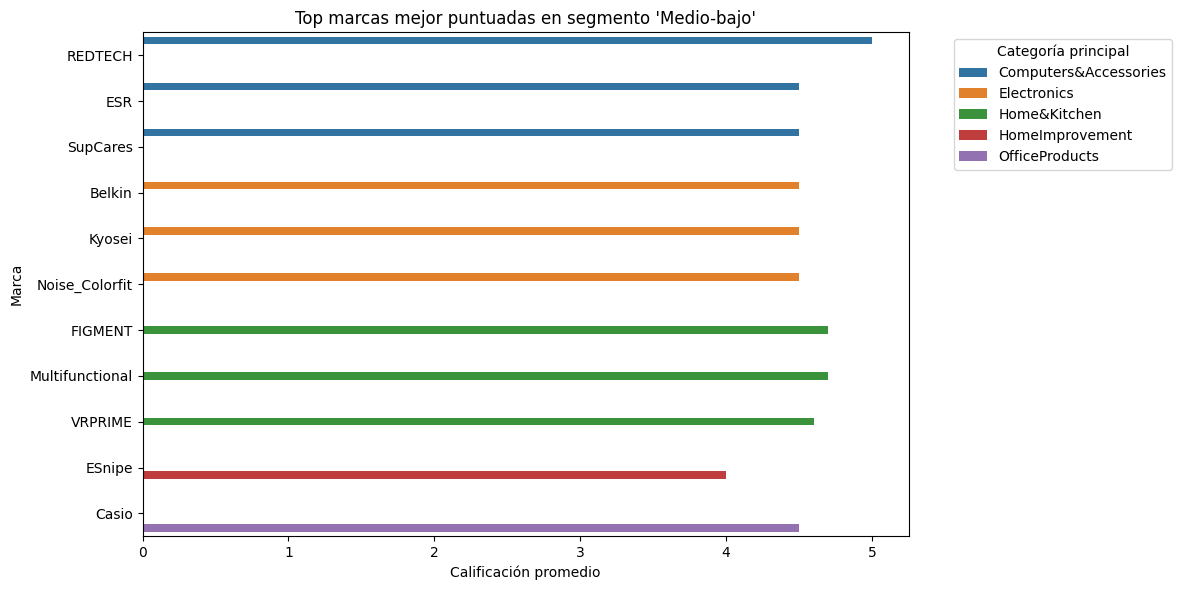

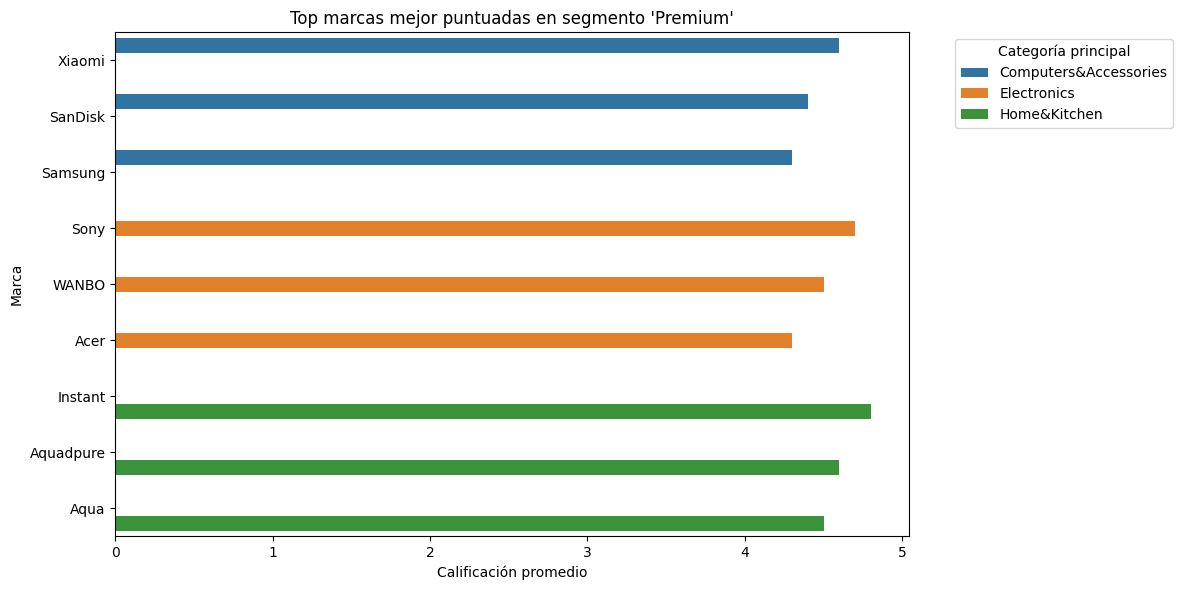

In [ ]:
# Calcular promedio de rating por marca dentro de cada segmento y categoría
top_marcas_seg_cat = (
    df_merged.groupby(["price_segment", "category_main", "brand"])["rating"]
    .mean()
    .reset_index()
)

# Ordenar por rating descendente
top_marcas_seg_cat = (
    top_marcas_seg_cat
    .sort_values(["price_segment", "category_main", "rating"], ascending=[True, True, False])
)

# Quedarse con top 3 marcas por cada segmento+categoría
top_marcas_seg_cat = (
    top_marcas_seg_cat.groupby(["price_segment", "category_main"])
    .head(3)
    .reset_index(drop=True)
)

print(top_marcas_seg_cat.head(10))  # muestra un preview

import seaborn as sns
import matplotlib.pyplot as plt

# Obtener lista de segmentos únicos
segmentos = top_marcas_seg_cat["price_segment"].unique()

# Loop por cada segmento
for seg in segmentos:
    data_seg = top_marcas_seg_cat[top_marcas_seg_cat["price_segment"] == seg]
    
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=data_seg,
        x="rating",
        y="brand",
        hue="category_main",
        dodge=True
    )
    plt.title(f"Top marcas mejor puntuadas en segmento '{seg}'")
    plt.xlabel("Calificación promedio")
    plt.ylabel("Marca")
    plt.legend(title="Categoría principal", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [ ]:
# Agrupar por categoría principal
cat_prices = df_merged.groupby("category_main").agg({
    "actual_price": "mean",
    "discounted_price": "mean",
    "discount_percentage": "mean"
}).round(2).reset_index()

# Ordenar y mostrar resultados
print("Categoría con precio promedio MÁS ALTO:")
display(cat_prices.sort_values(by="actual_price", ascending=False).head(1))

print("\nCategoría con precio promedio MÁS BAJO:")
display(cat_prices.sort_values(by="actual_price", ascending=True).head(1))

print("\nCategoría con MAYOR descuento promedio:")
display(cat_prices.sort_values(by="discount_percentage", ascending=False).head(1))


Categoría con precio promedio MÁS ALTO:


,category_main,actual_price,discounted_price,discount_percentage
2,Electronics,8282.16,4649.53,51.89



Categoría con precio promedio MÁS BAJO:


,category_main,actual_price,discounted_price,discount_percentage
8,Toys&Games,150.0,150.0,0.0



Categoría con MAYOR descuento promedio:


,category_main,actual_price,discounted_price,discount_percentage
5,HomeImprovement,799.0,337.0,57.5


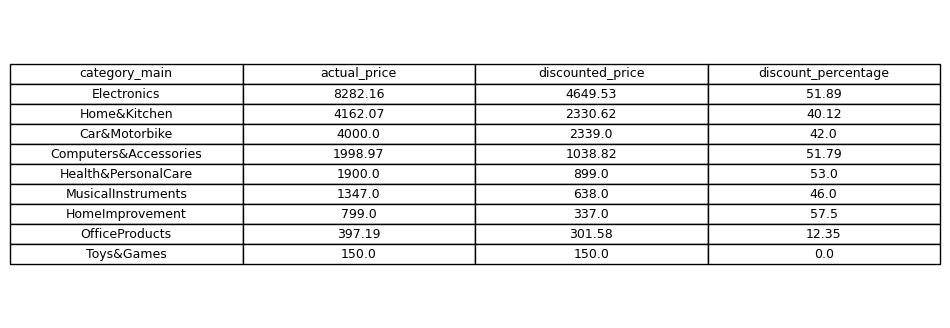

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por categoría principal
cat_prices = df_merged.groupby("category_main").agg({
    "actual_price": "mean",
    "discounted_price": "mean",
    "discount_percentage": "mean"
}).round(2).reset_index()

# Ordenar por precio promedio para que quede más legible
cat_prices = cat_prices.sort_values(by="actual_price", ascending=False)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 4))  # Ajusta el tamaño según necesites
ax.axis('off')  # Quitamos los ejes

# Dibujar tabla
table = ax.table(
    cellText=cat_prices.head(10).values,   # mostramos solo top 10
    colLabels=cat_prices.columns,
    cellLoc='center',
    loc='center'
)

# Ajustar estilo
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)  # ajustar tamaño de la tabla

# Guardar como imagen
plt.savefig("../visualizaciones/categorias_precios.png", dpi=300, bbox_inches="tight")
plt.show()
